In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import folium
import matplotlib as plt
import json

In [2]:
#Datos itinerarios de última hasta mayo 2018

In [3]:
import zipfile

path_to_zip = './data/202105_movements-json.zip'
directory_to_extract_to = './data/'
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [4]:
with open('./data/202105_movements.json', encoding='latin-1') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. 
    # It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

df = pd.DataFrame(data)

In [5]:
display(df.head())

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,{'$oid': '6093156e1b91311e205ea946'},064ab31ac9ea01016a78576f442ad53b6055faf5486e29...,15,1,6,488,15,0,91,2021-05-01T00:00:00Z,
1,{'$oid': '6093156e1b91311e205ea947'},9ad5e191c50694a8653b5f310a3a5ee769b5e8cf87595e...,23,1,19,754,104,0,86,2021-05-01T00:00:00Z,
2,{'$oid': '6093156e1b91311e205ea948'},7019de3db24cf1294a743248ebdd8200d9bb351b76a59d...,18,1,22,900,170,0,215,2021-05-01T00:00:00Z,
3,{'$oid': '6093156e1b91311e205ea950'},d2d6cfb2453cae1091e8f5e6c8a6027388fd2977360eab...,24,1,16,823,134,4,106,2021-05-01T00:00:00Z,28028
4,{'$oid': '6093156e1b91311e205ea951'},a2b096809571c4ec169373f4e757a682dade32fd02dde1...,20,1,16,283,175,3,177,2021-05-01T00:00:00Z,28005


In [6]:
path_to_zip = './data/202105-json.zip'
directory_to_extract_to = './data/'
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
    
with open('./data/202105.json', encoding='latin-1') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. 
    # It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

df_ = pd.DataFrame(data)
display(df_)

,_id,stations
0,2021-05-01T00:23:14.845494,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
1,2021-05-01T01:23:20.563888,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
2,2021-05-01T02:23:20.606340,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
3,2021-05-01T03:23:21.653407,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
4,2021-05-01T04:23:21.823719,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
...,...,...
737,2021-05-31T19:43:31.651345,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
738,2021-05-31T20:43:32.790392,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
739,2021-05-31T21:43:35.112465,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
740,2021-05-31T22:43:37.163988,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."


In [7]:
display(df_.stations[0])

[{'activate': 1,
  'name': 'Puerta del Sol A',
  'reservations_count': 0,
  'light': 2,
  'total_bases': 30,
  'free_bases': 13,
  'number': '1a',
  'longitude': '-3.7018341',
  'no_available': 0,
  'address': 'Puerta del Sol nº 1',
  'latitude': '40.4172137',
  'dock_bikes': 14,
  'id': 1},
 {'activate': 1,
  'name': 'Puerta del Sol B',
  'reservations_count': 0,
  'light': 1,
  'total_bases': 30,
  'free_bases': 5,
  'number': '1b',
  'longitude': '-3.701602938060457',
  'no_available': 0,
  'address': 'Puerta del Sol nº 1',
  'latitude': '40.41731271011562',
  'dock_bikes': 24,
  'id': 2},
 {'activate': 1,
  'name': 'Miguel Moya',
  'reservations_count': 0,
  'light': 0,
  'total_bases': 24,
  'free_bases': 17,
  'number': '2',
  'longitude': '-3.7058415',
  'no_available': 0,
  'address': 'Calle Miguel Moya nº 1',
  'latitude': '40.4205886',
  'dock_bikes': 5,
  'id': 3},
 {'activate': 1,
  'name': 'Plaza Conde Suchil',
  'reservations_count': 0,
  'light': 2,
  'total_bases': 18,


In [3]:
# Watch out! lines=True needed
BIKE_RIDES_DATASET= '.data/tour/201704_Usage_Bicimad.json'

#df = pd.read_json(BIKE_RIDES_DATASET, lines=True)


In [4]:
BIKE_RIDES_DATASET

'.data/tour/201704_Usage_Bicimad.json'

In [5]:
def read_json(filepath):
    if os.path.splitext(filepath)[1] != '.csv':
        return  # or whatever
    seps = [',', ';', '\t']                    # ',' is default
    encodings = [None, 'utf-8', 'ISO-8859-1']  # None is default
    for sep in seps:
        for encoding in encodings:
            try:
                return pd.read_csv(filepath, encoding=encoding, sep=sep)
            except Exception:  # should really be more specific 
                pass
    raise ValueError("{!r} is has no encoding in {} or seperator in {}".format(filepath, encodings, seps))

In [6]:
with open('.data/tour/201704_Usage_Bicimad.json', encoding='latin-1') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. 
    # It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

df = pd.DataFrame(data)

In [7]:
df_track = df.loc[df.track.notnull()]

In [8]:
df_track['track'][2]

{'type': 'FeatureCollection',
 'features': [{'geometry': {'type': 'Point',
    'coordinates': [-3.70870729972222, 40.425555]},
   'type': 'Feature',
   'properties': {'var': '28015,ES,Madrid,Madrid,CALLE NOVICIADO 7,Madrid',
    'speed': 5.52,
    'secondsfromstart': 132}},
  {'geometry': {'type': 'Point',
    'coordinates': [-3.71201159972222, 40.426343]},
   'type': 'Feature',
   'properties': {'var': '28015,ES,Madrid,Madrid,CALLE MANUEL 7,Madrid',
    'speed': 2.19,
    'secondsfromstart': 72}}]}

In [9]:
df_track.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,track
2,{'$oid': '58e5e5e7865e9c221ca458b2'},877deab4cc256bb87e02abc1db75005ac2b66d65be8849...,5,1,5,171,15,4,16,{'$date': '2017-04-01T01:00:00.000+0200'},28053,"{'type': 'FeatureCollection', 'features': [{'g..."
3,{'$oid': '58e5e5e7865e9c221ca458b8'},91bbf6c3ba396f84cce4e96e59be42b0824a16c8a1bf89...,18,1,20,388,23,4,57,{'$date': '2017-04-01T01:00:00.000+0200'},28012,"{'type': 'FeatureCollection', 'features': [{'g..."
4,{'$oid': '58e5e5e7865e9c221ca458b9'},4476cabb023b8b4473e5b6e78a1a79e0ebc8910c8e9989...,2,1,2,381,23,4,43,{'$date': '2017-04-01T01:00:00.000+0200'},28042,"{'type': 'FeatureCollection', 'features': [{'g..."
5,{'$oid': '58e5e5e7865e9c221ca458ba'},b9c8654c6e2b11d3aa00b4fb242fc875940978cdc2e7b5...,6,1,3,299,23,3,43,{'$date': '2017-04-01T01:00:00.000+0200'},28005,"{'type': 'FeatureCollection', 'features': [{'g..."
6,{'$oid': '58e5e5e7865e9c221ca458bb'},322333231f000c59662af3d46b6c5f68ddf504e32a311b...,8,0,22,409,23,0,43,{'$date': '2017-04-01T01:00:00.000+0200'},,"{'type': 'FeatureCollection', 'features': [{'g..."


In [10]:
lista = [df_track['unplug_hourTime'][i]['$date'] for i in df_track.index]
df_track['pick_dates'] = [pd.Timestamp(i) for i in lista]

/home/fserrey/anaconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df_track['pick_dates']

2        2017-04-01 01:00:00+02:00
3        2017-04-01 01:00:00+02:00
4        2017-04-01 01:00:00+02:00
5        2017-04-01 01:00:00+02:00
6        2017-04-01 01:00:00+02:00
                    ...           
253508   2017-04-30 23:00:00+02:00
253511   2017-04-30 23:00:00+02:00
253512   2017-04-30 23:00:00+02:00
253514   2017-04-30 23:00:00+02:00
253515   2017-04-30 23:00:00+02:00
Name: pick_dates, Length: 149702, dtype: datetime64[ns, pytz.FixedOffset(120)]

In [12]:
type(df_track['track'][2])

dict

In [16]:
def to_geojson(row):
    valid_geojson = {}
    geojson_features = row["FeatureCollection"]["Features"]
    valid_geojson["type"] = "FeatureCollection"
    valid_geojson["features"] = geojson_features
    return valid_geojson

df_with_tracks = df_track.copy()
df_with_tracks.reset_index(drop=True, inplace=True)
print(df_with_tracks.columns)
df_with_tracks["GeoJSON"] = df_with_tracks['track']

Index(['_id', 'user_day_code', 'idplug_base', 'user_type', 'idunplug_base',
       'travel_time', 'idunplug_station', 'ageRange', 'idplug_station',
       'unplug_hourTime', 'zip_code', 'track', 'pick_dates'],
      dtype='object')


In [17]:
df_with_tracks.sort_values(by=['travel_time'], ascending=False)[["user_type", "travel_time", "GeoJSON"]]

df_bike = df_with_tracks[df_with_tracks['user_type'] == 1].sort_values(by=['travel_time'], ascending=False).iloc[1600]["GeoJSON"]
# We keep type 1 because are our main target here

with open("df_bike.json", "wb") as f:
    f.write(json.dumps(df_bike).encode("utf-8"))

In [8]:
dfg = gpd.read_file('df_bike.json')

In [9]:
dfg.shape

(12, 4)

<AxesSubplot:>

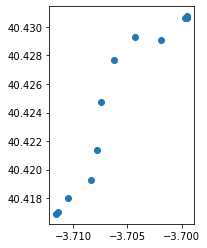

In [10]:
dfg.plot()

In [11]:
mapa = folium.Map(location=[40.417000, -3.703000], zoom_start=14)
file = 'df_bike.json'

# 2 possibilities I tried:
folium.GeoJson(file,name='geojson').add_to(mapa)

mapa

In [14]:
dfg

,var,speed,secondsfromstart,geometry
0,"28010,ES,Madrid,Madrid,CALLE MANUEL CORTINA 2,...",0.00,4267,POINT (-3.69952 40.43063)
1,"28010,ES,Madrid,Madrid,CALLE MANUEL SILVELA 20...",0.00,653,POINT (-3.69948 40.43075)
2,"28010,ES,Madrid,Madrid,CALLE LUCHANA 23,Madrid",6.94,593,POINT (-3.69974 40.43066)
3,"28004,ES,Madrid,Madrid,CALLE SAGASTA,Madrid",0.00,532,POINT (-3.70189 40.42912)
4,"28004,ES,Madrid,Madrid,CALLE CARRANZA 17,Madrid",5.25,472,POINT (-3.70433 40.42933)
5,"28015,ES,Madrid,Madrid,CALLE SAN BERNARDO 79,M...",4.94,412,POINT (-3.70626 40.42767)
6,"28015,ES,Madrid,Madrid,CALLE SAN BERNARDO 49B,...",5.66,352,POINT (-3.70747 40.42470)
7,"28013,ES,Madrid,Madrid,CALLE GRAN VIA 51,Madrid",4.44,292,POINT (-3.70780 40.42137)
8,"28013,ES,Madrid,Madrid,CALLE CAÑOS DEL PERAL 1...",2.94,231,POINT (-3.70834 40.41924)
9,"28013,ES,Madrid,Madrid,CALLE CARLOS III 3,Madrid",3.58,171,POINT (-3.71044 40.41799)


In [17]:
# Aggregate these points with the GroupBy
#df = dfg.groupby(['entity_id'])['geometry'].apply(lambda x: LineString(x.tolist()))
df = gpd.GeoDataFrame(dfg, geometry='geometry')

In [18]:
df

,var,speed,secondsfromstart,geometry
0,"28010,ES,Madrid,Madrid,CALLE MANUEL CORTINA 2,...",0.00,4267,POINT (-3.69952 40.43063)
1,"28010,ES,Madrid,Madrid,CALLE MANUEL SILVELA 20...",0.00,653,POINT (-3.69948 40.43075)
2,"28010,ES,Madrid,Madrid,CALLE LUCHANA 23,Madrid",6.94,593,POINT (-3.69974 40.43066)
3,"28004,ES,Madrid,Madrid,CALLE SAGASTA,Madrid",0.00,532,POINT (-3.70189 40.42912)
4,"28004,ES,Madrid,Madrid,CALLE CARRANZA 17,Madrid",5.25,472,POINT (-3.70433 40.42933)
5,"28015,ES,Madrid,Madrid,CALLE SAN BERNARDO 79,M...",4.94,412,POINT (-3.70626 40.42767)
6,"28015,ES,Madrid,Madrid,CALLE SAN BERNARDO 49B,...",5.66,352,POINT (-3.70747 40.42470)
7,"28013,ES,Madrid,Madrid,CALLE GRAN VIA 51,Madrid",4.44,292,POINT (-3.70780 40.42137)
8,"28013,ES,Madrid,Madrid,CALLE CAÑOS DEL PERAL 1...",2.94,231,POINT (-3.70834 40.41924)
9,"28013,ES,Madrid,Madrid,CALLE CARLOS III 3,Madrid",3.58,171,POINT (-3.71044 40.41799)


In [ ]:
df = pd.io.json.json_normalize(df['unplug_hourTime'][0])
df = pd.io.json.json_normalize(df['unplug_hourTime'][0])

df.head()